# Plot Scores for Columns of MSA

## Import and Clean Data

In [52]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

in_fh = r"D:\Orthologs\Ortholog_Codon_Dist\PTHR42792\P04949_ortholog_msa_scores.data"

df = pd.read_csv(in_fh)

In [53]:
# remove columns with no information
df_clean = df[df.Identity != 'X']

print(len(df_clean), "columns used in analysis.\n")

# convert values in columns Percent ID and on to floats
df_clean[df_clean.columns[1:]] = df_clean[df_clean.columns[1:]].astype('float')
df_clean.dtypes

261 columns used in analysis.



Identity                object
Percent Identity       float64
Avg Blosum62 Score     float64
Avg Frequency Score    float64
Fraction Aligned       float64
Fraction Disordered    float64
dtype: object

## Distributions of Each Score

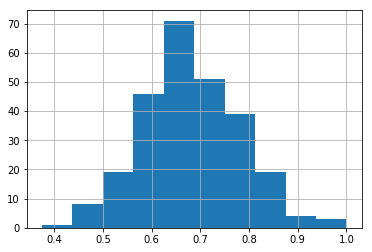

In [54]:
df_clean['Avg Frequency Score'].hist();

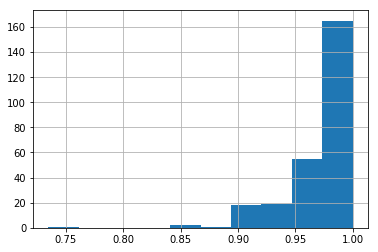

In [55]:
df_clean['Fraction Aligned'].hist();

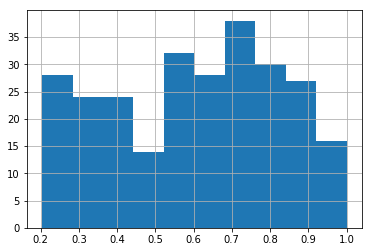

In [56]:
df_clean['Fraction Disordered'].hist();

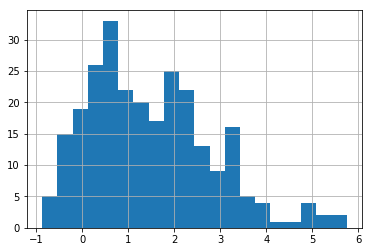

In [57]:
df_clean['Avg Blosum62 Score'].hist(bins = 20);

## Plot Column Scores

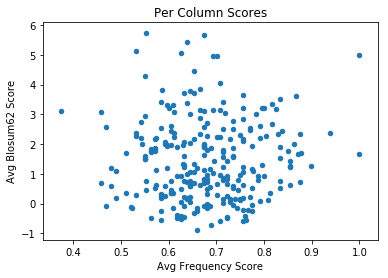

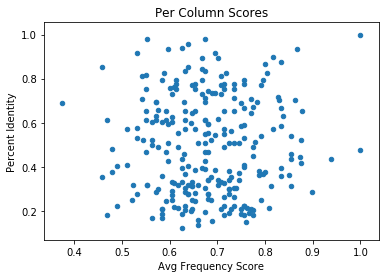

In [58]:
# matplotlib backend to plot dataframe
df_clean.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores');

Disorder Split at 50% for same scores above

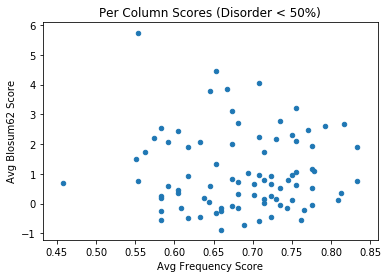

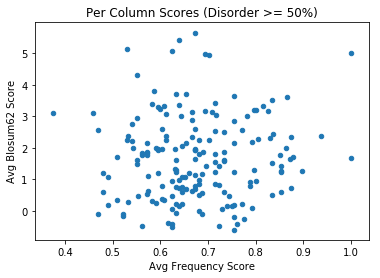

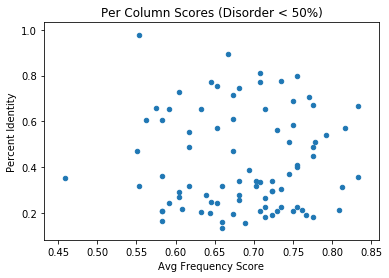

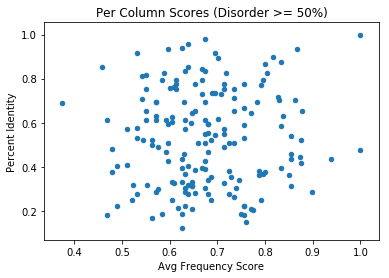

In [59]:
df_clean_dis1 = df_clean[df_clean['Fraction Disordered'] < 0.5]
df_clean_dis2 = df_clean[df_clean['Fraction Disordered'] >= 0.5]

df_clean_dis1.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder < 50%)')
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Avg Blosum62 Score', title='Per Column Scores (Disorder >= 50%)')
df_clean_dis1.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder < 50%)')
df_clean_dis2.plot.scatter('Avg Frequency Score', 'Percent Identity', title='Per Column Scores (Disorder >= 50%)');

Attempting to filter by fraction aligned produced no differences (maybe shrink size of window)

In [60]:
print(min(df_clean['Fraction Aligned']))

0.7346938775510204


In [61]:
df_clean_25 = df_clean[df_clean['Fraction Aligned'] <= 0.25]
df_clean_25

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered


In [62]:
df_clean_50 = df_clean[(df_clean['Fraction Aligned'] <= 0.50) & (df_clean['Fraction Aligned'] > 0.25)]
df_clean_50

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered


In [63]:
df_clean_75 = df_clean[(df_clean['Fraction Aligned'] <= 0.75) & (df_clean['Fraction Aligned'] > 0.50)]
df_clean_75

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
336,x,0.361111,-0.561905,0.583333,0.734694,0.222222


In [64]:
df_clean_100 = df_clean[(df_clean['Fraction Aligned'] <= 1.0) & (df_clean['Fraction Aligned'] > 0.75)]
df_clean_100

,Identity,Percent Identity,Avg Blosum62 Score,Avg Frequency Score,Fraction Aligned,Fraction Disordered
0,M,1.000000,5.000000,1.000000,0.918367,1.000000
63,R,0.318182,-0.159619,0.522727,0.897959,1.000000
64,I,0.600000,3.008081,0.644444,0.918367,1.000000
65,N,0.760870,3.321739,0.608696,0.938776,0.978261
66,T,0.695652,1.973913,0.630435,0.938776,0.891304
67,N,0.978261,5.652174,0.673913,0.938776,0.847826
68,V,0.282609,1.058937,0.652174,0.938776,0.782609
69,S,0.319149,0.473636,0.553191,0.959184,0.765957
70,A,0.510638,1.962997,0.595745,0.959184,0.765957
71,L,0.446809,1.658649,0.872340,0.959184,0.765957


## Distribution of Each Score Split at 50% Disorder

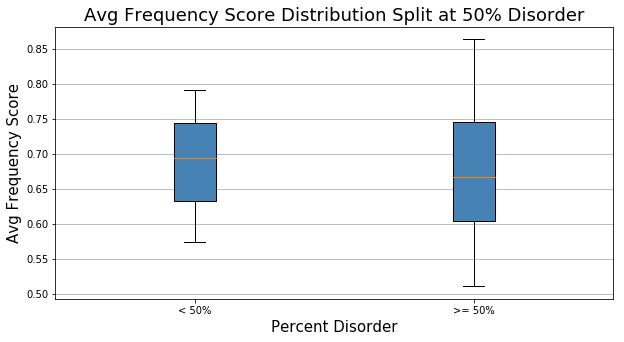

In [66]:
plt.figure(figsize=(10, 5)) # shrink later if wanted
plt.grid(True, axis='y')

# example of how to set each box same color
color = "steelblue"
boxplot = plt.boxplot([df_clean_dis1["Avg Frequency Score"], df_clean_dis2["Avg Frequency Score"]], whis=[5, 95], showfliers=False,
                      patch_artist=True, boxprops=dict(facecolor=color, color="black"))

plt.xticks([1,2], ["< 50%", ">= 50%"])
#plt.yticks(fontsize=12)
plt.ylabel("Avg Frequency Score", fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Frequency Score Distribution Split at 50% Disorder', fontsize=18);


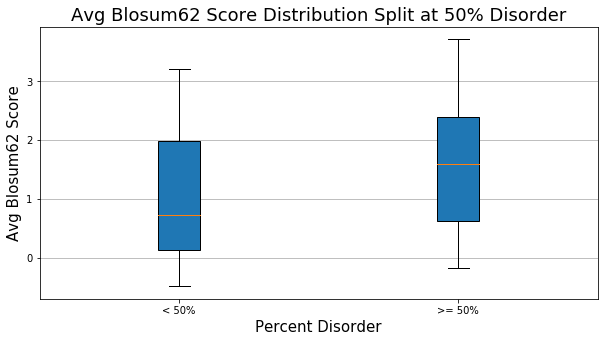

In [67]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Avg Blosum62 Score'], df_clean_dis2['Avg Blosum62 Score']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Avg Blosum62 Score', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Avg Blosum62 Score Distribution Split at 50% Disorder', fontsize=18);

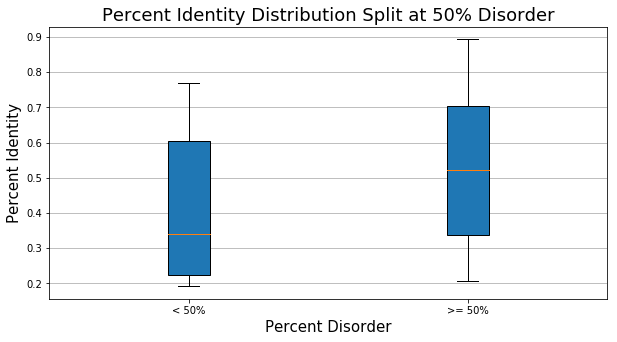

In [68]:
plt.figure(figsize=(10, 5))
plt.grid(True, axis='y')

boxplot = plt.boxplot([df_clean_dis1['Percent Identity'], df_clean_dis2['Percent Identity']], whis=[5, 95], showfliers=False,
                      patch_artist=True)

plt.xticks([1,2], ["< 50%", ">= 50%"])
plt.ylabel('Percent Identity', fontsize=15)
plt.xlabel('Percent Disorder', fontsize=15)
plt.title('Percent Identity Distribution Split at 50% Disorder', fontsize=18);

## Plot Scores with Disorder

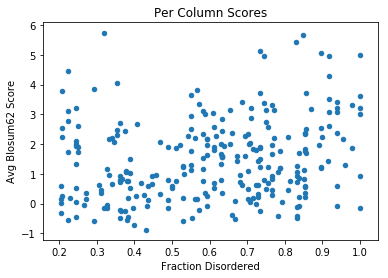

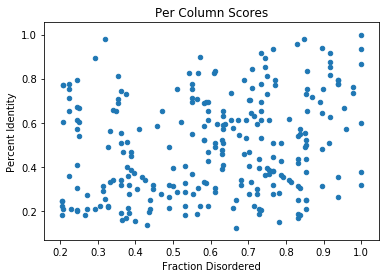

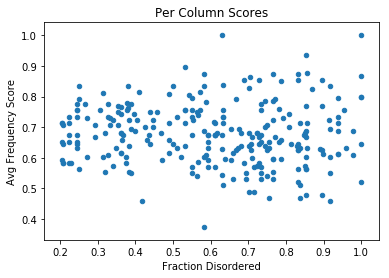

In [69]:
df_clean.plot.scatter('Fraction Disordered', 'Avg Blosum62 Score', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Percent Identity', title='Per Column Scores')
df_clean.plot.scatter('Fraction Disordered', 'Avg Frequency Score', title='Per Column Scores');

# Fraction Disorder Filters

In [72]:
df_clean_25d = df_clean[df_clean['Fraction Disordered'] <= 0.25]
len(df_clean_25d)

25

In [73]:
df_clean_50d = df_clean[(df_clean['Fraction Disordered'] <= 0.50) & (df_clean['Fraction Disordered'] > 0.25)]
len(df_clean_50d)

62

In [74]:
df_clean_75d = df_clean[(df_clean['Fraction Disordered'] <= 0.75) & (df_clean['Fraction Disordered'] > 0.50)]
len(df_clean_75d)

98

In [75]:
df_clean_100d = df_clean[(df_clean['Fraction Disordered'] <= 1.0) & (df_clean['Fraction Disordered'] > 0.75)]
len(df_clean_100d)

76